In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
df = pd.read_csv('../data/processed/complete_merged.csv')
df.head()

,Country,Year,Agricultural production index (2014-2016=100),"Balance of payments, current account (million US$)",CPI: Consumer Price Index (2010=100),Economy: Agriculture (% of Gross Value Added),Economy: Industry (% of Gross Value Added),Economy: Services and other activity (% of GVA),Employment in agriculture (% of employed),Employment in industry (% of employed),...,Capital city,Exchange rate (per US$),National currency,"Pop. density (per km2, 2024)","Population (000, 2024)",Region,Sex ratio (m per 100 f),Surface area (km2),UN membership date,Capital_city_pop
0,Afghanistan,2015.0,96.0,4193.0,133.0,22.0,9.6,68.3,44.6,20.7,...,Kabul,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0
1,Afghanistan,2020.0,112.0,3137.0,150.0,31.4,13.6,55.0,46.0,18.5,...,Kabul,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0
2,Afghanistan,2024.0,111.0,NaN,NaN,35.5,16.9,47.5,46.6,18.3,...,Kabul,77.1,Afghani (AFN),65.7,42648.0,Southern Asia,102.0,652864.0,1946-11-19,4114.0
3,Albania,2015.0,100.0,980.0,111.0,22.5,24.8,52.7,41.3,18.7,...,Tirana,93.9,Lek (ALL),101.9,2792.0,Southern Europe,97.8,28748.0,1955-12-14,484.6
4,Albania,2020.0,106.0,1315.0,121.0,21.9,22.9,55.1,36.2,20.6,...,Tirana,93.9,Lek (ALL),101.9,2792.0,Southern Europe,97.8,28748.0,1955-12-14,484.6


In [52]:
df['gdp_class'] = pd.qcut(df["GDP per capita (current US$)"],
                                q=4,
                                labels=False, # Returns integer labels
                                duplicates='drop')

df['gdp_class'].value_counts()

gdp_class
0.0    158
3.0    158
1.0    157
2.0    157
Name: count, dtype: int64

In [53]:
df["Education: Primary gross enrol. ratio - average"] = df["Education: Primary gross enrol. ratio - Female (per 100 pop.)"] + df["Education: Primary gross enrol. ratio - Male (per 100 pop.)"] / 2
df["Education: Upper Sec. gross enrol. ratio - average"] = df["Education: Upper Sec. gross enrol. ratio - Female (per 100 pop.)"] + df['Education: Upper Sec. gross enrol. ratio - Male (per 100 pop.)'] / 2
df["Education: Lower Sec. gross enrol. ratio - average"] = df["Education: Lower Sec. gross enrol. ratio - Female (per 100 pop.)"] + df["Education: Lower Sec. gross enrol. ratio - Male (per 100 pop.)"] / 2
df["Life expectancy at birth - average"] = (df["Life expectancy at birth - Female (years)"] + df["Life expectancy at birth - Male (years)"])/2

df.drop(columns=["Education: Primary gross enrol. ratio - Female (per 100 pop.)",
                 "Education: Primary gross enrol. ratio - Male (per 100 pop.)",
                 "Education: Upper Sec. gross enrol. ratio - Female (per 100 pop.)",
                 "Education: Upper Sec. gross enrol. ratio - Male (per 100 pop.)",
                 "Education: Lower Sec. gross enrol. ratio - Female (per 100 pop.)",
                 "Education: Lower Sec. gross enrol. ratio - Male (per 100 pop.)",
                 "Life expectancy at birth - Female (years)",
                 "Life expectancy at birth - Male (years)",
                    ], inplace=True)

In [54]:
df.head()

,Country,Year,Agricultural production index (2014-2016=100),"Balance of payments, current account (million US$)",CPI: Consumer Price Index (2010=100),Economy: Agriculture (% of Gross Value Added),Economy: Industry (% of Gross Value Added),Economy: Services and other activity (% of GVA),Employment in agriculture (% of employed),Employment in industry (% of employed),...,Region,Sex ratio (m per 100 f),Surface area (km2),UN membership date,Capital_city_pop,gdp_class,Education: Primary gross enrol. ratio - average,Education: Upper Sec. gross enrol. ratio - average,Education: Lower Sec. gross enrol. ratio - average,Life expectancy at birth - average
0,Afghanistan,2015.0,96.0,4193.0,133.0,22.0,9.6,68.3,44.6,20.7,...,Southern Asia,102.0,652864.0,1946-11-19,4114.0,0.0,148.6,55.05,87.15,62.30
1,Afghanistan,2020.0,112.0,3137.0,150.0,31.4,13.6,55.0,46.0,18.5,...,Southern Asia,102.0,652864.0,1946-11-19,4114.0,0.0,153.6,56.35,98.80,61.60
2,Afghanistan,2024.0,111.0,NaN,NaN,35.5,16.9,47.5,46.6,18.3,...,Southern Asia,102.0,652864.0,1946-11-19,4114.0,0.0,NaN,NaN,NaN,66.25
3,Albania,2015.0,100.0,980.0,111.0,22.5,24.8,52.7,41.3,18.7,...,Southern Europe,97.8,28748.0,1955-12-14,484.6,1.0,169.0,144.15,159.80,78.40
4,Albania,2020.0,106.0,1315.0,121.0,21.9,22.9,55.1,36.2,20.6,...,Southern Europe,97.8,28748.0,1955-12-14,484.6,1.0,149.6,138.00,146.20,77.85


In [55]:
# Basic information about the dataset
print("Dataset shape:", df.shape)
print("\nGDP class distribution:")
print(df['gdp_class'].value_counts().sort_index())
print("\nData types:")
print(df.dtypes.value_counts())
print("\nMissing values summary:")
print(df.isnull().sum().sum(), "total missing values")
print(f"{(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}% of data is missing")

Dataset shape: (696, 76)

GDP class distribution:
gdp_class
0.0    158
1.0    157
2.0    157
3.0    158
Name: count, dtype: int64

Data types:
float64    71
object      5
Name: count, dtype: int64

Missing values summary:
9670 total missing values
18.28% of data is missing


# Exploratory Data Analysis for GDP Classification

## 1. Target Variable Analysis
Let's analyze the distribution and characteristics of our target variable `gdp_class`.

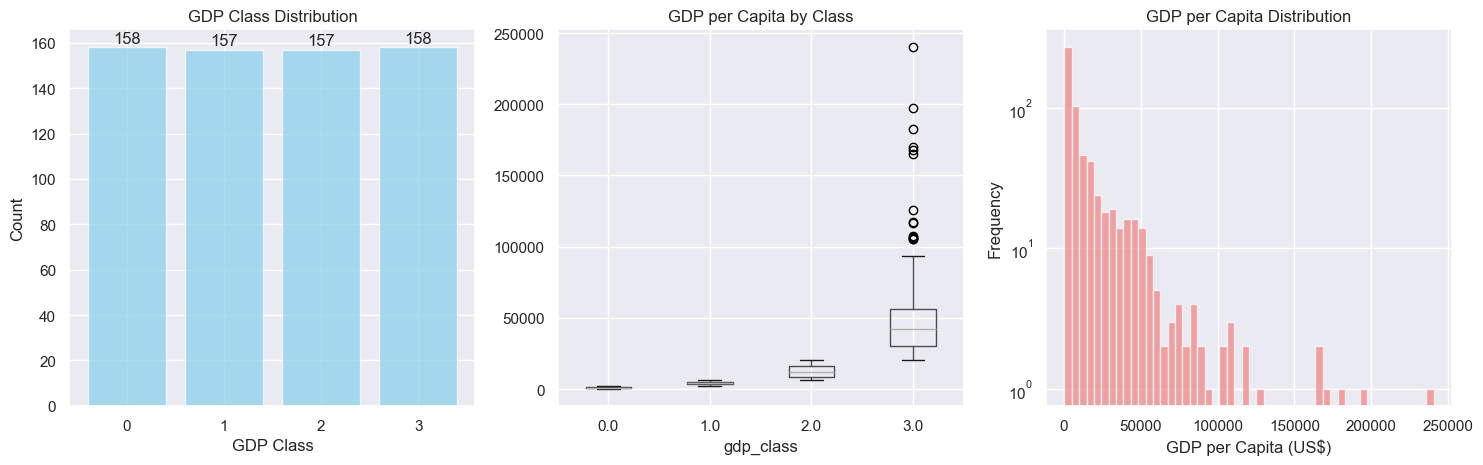

GDP per capita ranges by class:
Class 0: $262 - $2,222 (median: $965)
Class 1: $2,231 - $6,630 (median: $3,950)
Class 2: $6,655 - $20,547 (median: $11,679)
Class 3: $20,708 - $240,535 (median: $42,279)


In [56]:
# Target variable analysis
plt.figure(figsize=(15, 5))

# GDP class distribution
plt.subplot(1, 3, 1)
gdp_counts = df['gdp_class'].value_counts().sort_index()
plt.bar(gdp_counts.index, gdp_counts.values, alpha=0.7, color='skyblue')
plt.title('GDP Class Distribution')
plt.xlabel('GDP Class')
plt.ylabel('Count')
for i, v in enumerate(gdp_counts.values):
    plt.text(i, v + 2, str(v), ha='center')

# GDP per capita distribution by class
plt.subplot(1, 3, 2)
df.boxplot(column='GDP per capita (current US$)', by='gdp_class', ax=plt.gca())
plt.title('GDP per Capita by Class')
plt.suptitle('')  # Remove automatic title

# GDP per capita histogram
plt.subplot(1, 3, 3)
plt.hist(df['GDP per capita (current US$)'].dropna(), bins=50, alpha=0.7, color='lightcoral')
plt.title('GDP per Capita Distribution')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale due to wide range

plt.tight_layout()
plt.show()

# Show GDP ranges for each class
print("GDP per capita ranges by class:")
for cls in sorted(df['gdp_class'].dropna().unique()):
    gdp_values = df[df['gdp_class'] == cls]['GDP per capita (current US$)'].dropna()
    print(f"Class {int(cls)}: ${gdp_values.min():,.0f} - ${gdp_values.max():,.0f} (median: ${gdp_values.median():,.0f})")

Found 71 features with >80% completeness for correlation analysis

Top 15 features most correlated with GDP class:
 1. Population age distribution - 0-14 years (%)       | Corr: -0.818 | N: 630
 2. Employment in agriculture (% of employed)          | Corr: -0.801 | N: 562
 3. Employment in services (% employed)                | Corr:  0.786 | N: 562
 4. Economy: Agriculture (% of Gross Value Added)      | Corr: -0.745 | N: 621
 5. Fertility rate, total (live births per woman)      | Corr: -0.733 | N: 630
 6. Population age distribution - 0-14 years/Populatio | Corr: -0.729 | N: 630
 7. Population age distribution - 60+ years (%)        | Corr:  0.697 | N: 630
 8. Under five mortality rate (per 1000 live births)   | Corr: -0.693 | N: 630
 9. GDP per capita (current US$)                       | Corr:  0.666 | N: 630
10. Economy: Services and other activity (% of GVA)    | Corr:  0.612 | N: 630
11. Energy supply per capita (Gigajoules)              | Corr:  0.577 | N: 624
12. Population g

/Users/kenjiminemura/.pyenv/versions/3.12.4/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2908: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


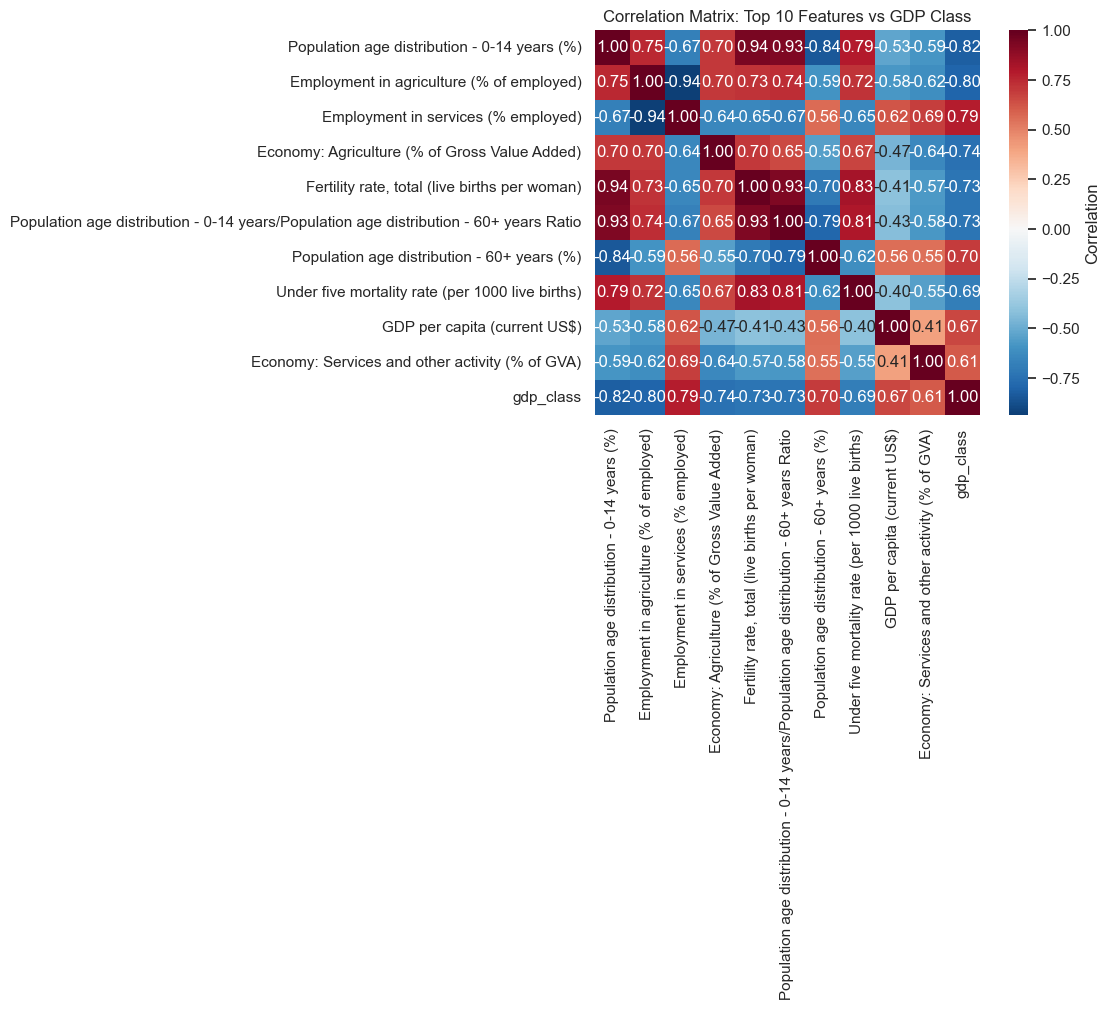

In [66]:
# Correlation analysis
# Select numeric features with less than 70% missing data for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
complete_features = []
for col in numeric_cols:
    if col != 'gdp_class' and df[col].notna().sum() / len(df) > 0.8:  # At least 80% complete
        complete_features.append(col)

print(f"Found {len(complete_features)} features with >80% completeness for correlation analysis")

# Calculate correlation with GDP class
correlations = []
for feature in complete_features:
    clean_data = df[[feature, 'gdp_class']].dropna()
    if len(clean_data) > 10:  
        corr = clean_data[feature].corr(clean_data['gdp_class'])
        correlations.append((feature, corr, len(clean_data)))

# Sort by absolute correlation
correlations = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)

# Display top correlations
print("\nTop 15 features most correlated with GDP class:")
for i, (feature, corr, n_obs) in enumerate(correlations[:15]):
    print(f"{i+1:2d}. {feature[:50]:<50} | Corr: {corr:6.3f} | N: {n_obs:3d}")

# Create correlation heatmap for top features
if len(correlations) >= 10:
    top_features = [item[0] for item in correlations[:10]] + ['gdp_class']
    corr_matrix = df[top_features].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f',
                square=True, cbar_kws={'label': 'Correlation'})
    plt.title('Correlation Matrix: Top 10 Features vs GDP Class')
    plt.tight_layout()
    plt.show()

In [58]:
categorical_cols = ["Region"]



=== ANÁLISIS DETALLADO: REGIÓN vs GDP CLASS ===
Número total de regiones: 22
Observaciones totales: 696

Distribución de países por región:
Region
Caribbean             78
Eastern Africa        60
Western Asia          54
Western Africa        51
Southern Europe       48
South America         42
Northern Europe       39
South-eastern Asia    33
Eastern Europe        30
Western Europe        27
Name: count, dtype: int64


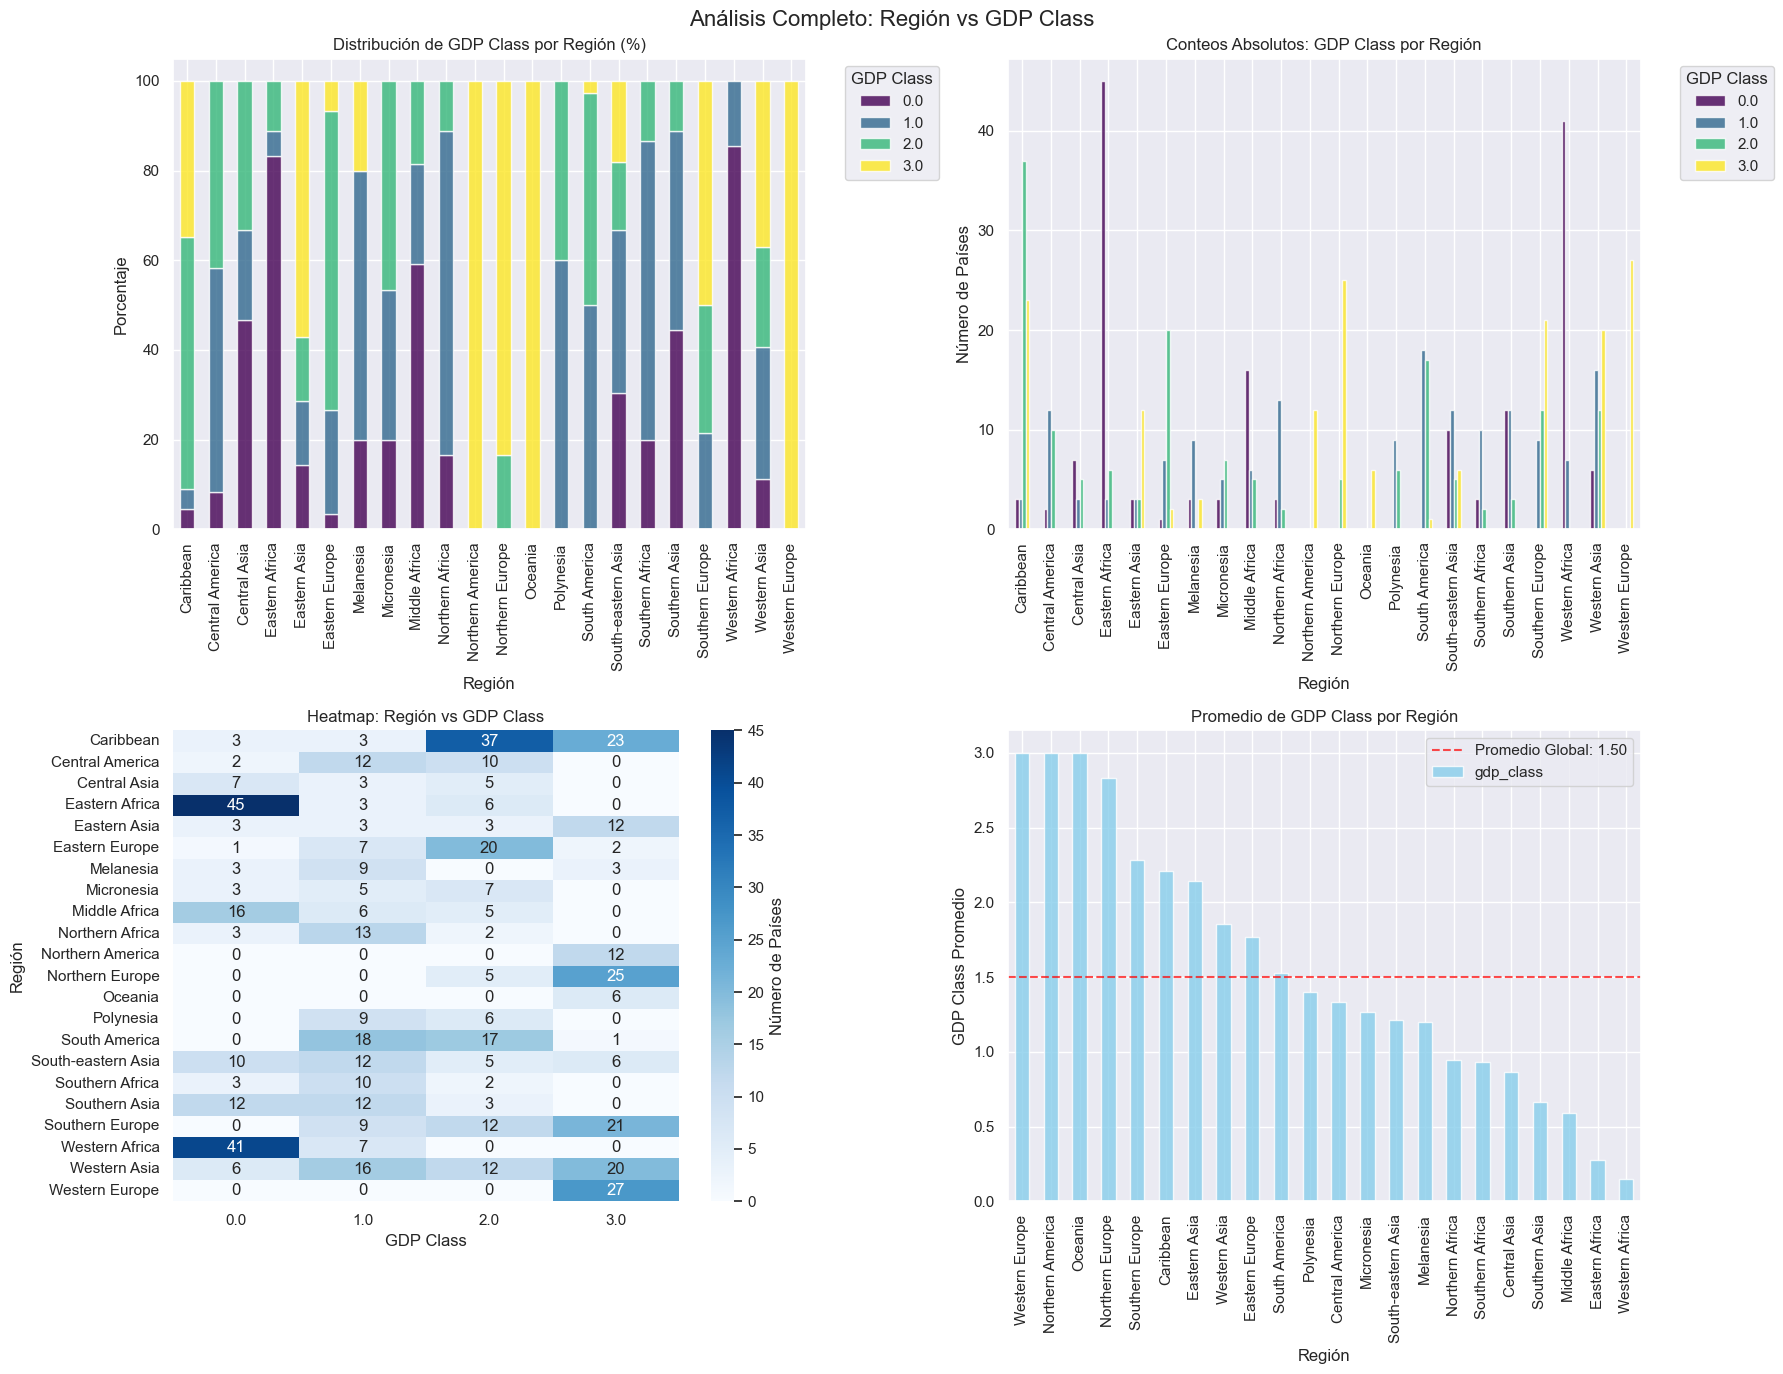

In [59]:
# Análisis detallado: Region vs GDP Class
print("=== ANÁLISIS DETALLADO: REGIÓN vs GDP CLASS ===")
print(f"Número total de regiones: {df['Region'].nunique()}")
print(f"Observaciones totales: {len(df)}")

# 1. Información básica por región
print("\nDistribución de países por región:")
region_counts = df['Region'].value_counts().sort_values(ascending=False)
print(region_counts.head(10))

# 2. Visualizaciones múltiples
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Análisis Completo: Región vs GDP Class', fontsize=16, y=0.98)

# 2.1 Distribución porcentual (barras apiladas)
ax1 = axes[0, 0]
region_gdp_pct = pd.crosstab(df['Region'], df['gdp_class'], normalize='index') * 100
region_gdp_pct.plot(kind='bar', stacked=True, ax=ax1, colormap='viridis', alpha=0.8)
ax1.set_title('Distribución de GDP Class por Región (%)', fontsize=12)
ax1.set_xlabel('Región')
ax1.set_ylabel('Porcentaje')
ax1.legend(title='GDP Class', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=90)

# 2.2 Conteos absolutos
ax2 = axes[0, 1]
region_gdp_counts = pd.crosstab(df['Region'], df['gdp_class'])
region_gdp_counts.plot(kind='bar', ax=ax2, colormap='viridis', alpha=0.8)
ax2.set_title('Conteos Absolutos: GDP Class por Región', fontsize=12)
ax2.set_xlabel('Región')
ax2.set_ylabel('Número de Países')
ax2.legend(title='GDP Class', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=90)

# 2.3 Heatmap
ax3 = axes[1, 0]
sns.heatmap(region_gdp_counts, annot=True, fmt='d', cmap='Blues', ax=ax3, cbar_kws={'label': 'Número de Países'})
ax3.set_title('Heatmap: Región vs GDP Class', fontsize=12)
ax3.set_xlabel('GDP Class')
ax3.set_ylabel('Región')

# 2.4 Promedio de GDP Class por región
ax4 = axes[1, 1]
region_avg_gdp = df.groupby('Region')['gdp_class'].mean().sort_values(ascending=False)
region_avg_gdp.plot(kind='bar', ax=ax4, color='skyblue', alpha=0.8)
ax4.set_title('Promedio de GDP Class por Región', fontsize=12)
ax4.set_xlabel('Región')
ax4.set_ylabel('GDP Class Promedio')
ax4.tick_params(axis='x', rotation=90)
ax4.axhline(y=df['gdp_class'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Promedio Global: {df["gdp_class"].mean():.2f}')
ax4.legend()

plt.tight_layout()
plt.savefig(f"../src/visualization/region_vs_gdpClass.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

## Model Development

In [ ]:
 1. Population age distribution - 0-14 years (%)       | Corr: -0.818 | N: 630
 2. Employment in agriculture (% of employed)          | Corr: -0.801 | N: 562
 3. Employment in services (% employed)                | Corr:  0.786 | N: 562
 4. Economy: Agriculture (% of Gross Value Added)      | Corr: -0.745 | N: 621
 5. Fertility rate, total (live births per woman)      | Corr: -0.733 | N: 630
 6. Population age distribution - 0-14 years/Populatio | Corr: -0.729 | N: 630
 7. Population age distribution - 60+ years (%)        | Corr:  0.697 | N: 630
 8. Under five mortality rate (per 1000 live births)   | Corr: -0.693 | N: 630
 9. GDP per capita (current US$)                       | Corr:  0.666 | N: 630
10. Economy: Services and other activity (% of GVA)    | Corr:  0.612 | N: 630
11. Energy supply per capita (Gigajoules)              | Corr:  0.577 | N: 624
12. Population growth rate (average annual %)          | Corr: -0.404 | N: 630
13. Employment in industry (% of employed)             | Corr:  0.386 | N: 562
14. International trade: exports (million current US$) | Corr:  0.302 | N: 609
15. International trade: imports (million current US$) | Corr:  0.301 | N: 609

In [64]:
x_features = [
    "Employment in agriculture (% of employed)",          
    "Employment in services (% employed)",                
    "Economy: Agriculture (% of Gross Value Added)",      
    "Fertility rate, total (live births per woman)",      
    "Health: Physicians (per 1 000 pop.)",                
    "Under five mortality rate (per 1000 live births)",   
    #"Urban population (% of total population)",           
    "GDP per capita (current US$)",                       
    "Economy: Services and other activity (% of GVA)",    
    #"Urban population growth rate (average annual %)",    
    "Population growth rate (average annual %)",          
    "Employment in industry (% of employed)",             
    "International trade: exports (million current US$)", 
    "International trade: imports (million current US$)", 
    "Health: Current expenditure (% of GDP)"              
]

dummies = pd.get_dummies(df["Region"], dtype=int)
df = df.join(dummies)

ValueError: columns overlap but no suffix specified: Index(['Caribbean', 'Central America', 'Central Asia', 'Eastern Africa',
       'Eastern Asia', 'Eastern Europe', 'Melanesia', 'Micronesia',
       'Middle Africa', 'Northern Africa', 'Northern America',
       'Northern Europe', 'Oceania', 'Polynesia', 'South America',
       'South-eastern Asia', 'Southern Africa', 'Southern Asia',
       'Southern Europe', 'Western Africa', 'Western Asia', 'Western Europe'],
      dtype='object')

In [65]:
# Create df_model for training with selected features and one-hot encoded regions
print("=== CREATING MODEL TRAINING DATASET ===")

# Get the names of the one-hot encoded region columns
region_columns = [col for col in df.columns if col in dummies.columns]

# Combine x_features with region dummy columns and target
model_columns = x_features + region_columns + ['gdp_class']

# Create the model dataset
df_model = df[model_columns].copy()

print(f"\nModel dataset created:")
print(f"Shape: {df_model.shape}")
print(f"Features: {len(x_features)} numerical + {len(region_columns)} regional dummies = {len(x_features) + len(region_columns)} total features")
print(f"Target: gdp_class")

# Check data completeness
print(f"\nData completeness analysis:")
print(f"Total observations: {len(df_model)}")
print(f"Complete cases: {df_model.dropna().shape[0]}")
print(f"Complete cases percentage: {(df_model.dropna().shape[0] / len(df_model) * 100):.1f}%")

# Missing values summary
missing_summary = df_model.isnull().sum()
missing_features = missing_summary[missing_summary > 0].sort_values(ascending=False)

if len(missing_features) > 0:
    print(f"\nFeatures with missing values:")
    for feature, missing_count in missing_features.items():
        if feature != 'gdp_class':
            missing_pct = (missing_count / len(df_model)) * 100
            print(f"  {feature}: {missing_count} ({missing_pct:.1f}%)")
else:
    print(f"\nNo missing values in the dataset!")

# Display first few rows
print(f"\nFirst 3 rows of df_model:")
print(df_model.head(3))

=== CREATING MODEL TRAINING DATASET ===

Model dataset created:
Shape: (696, 36)
Features: 13 numerical + 22 regional dummies = 35 total features
Target: gdp_class

Data completeness analysis:
Total observations: 696
Complete cases: 451
Complete cases percentage: 64.8%

Features with missing values:
  Health: Physicians (per 1 000 pop.): 221 (31.8%)
  Health: Current expenditure (% of GDP): 128 (18.4%)
  Employment in agriculture (% of employed): 118 (17.0%)
  Employment in services (% employed): 117 (16.8%)
  Employment in industry (% of employed): 117 (16.8%)
  Economy: Agriculture (% of Gross Value Added): 75 (10.8%)
  GDP per capita (current US$): 66 (9.5%)
  Economy: Services and other activity (% of GVA): 66 (9.5%)
  International trade: exports (million current US$): 63 (9.1%)
  International trade: imports (million current US$): 63 (9.1%)
  Fertility rate, total (live births per woman): 6 (0.9%)
  Under five mortality rate (per 1000 live births): 6 (0.9%)
  Population growth ra

In [62]:
# Analyze the model dataset structure
print("=== MODEL DATASET ANALYSIS ===")

# Separate feature types for analysis
numerical_features = x_features
regional_features = region_columns
target = 'gdp_class'

print(f"Dataset composition:")
print(f"  Numerical features: {len(numerical_features)}")
print(f"  Regional dummy features: {len(regional_features)}")
print(f"  Target variable: 1")
print(f"  Total columns: {len(df_model.columns)}")

# Check target distribution in model dataset
print(f"\nTarget variable distribution in df_model:")
target_dist = df_model['gdp_class'].value_counts().sort_index()
print(target_dist)

# Calculate target percentages
target_pct = (target_dist / target_dist.sum() * 100).round(1)
print(f"\nTarget percentages:")
for class_val, pct in target_pct.items():
    print(f"  Class {int(class_val)}: {pct}%")

# Feature correlation with target (for numerical features only)
print(f"\nTop numerical features correlation with target:")
numerical_df = df_model[numerical_features + [target]].copy()
correlations_model = []

for feature in numerical_features:
    clean_data = numerical_df[[feature, target]].dropna()
    if len(clean_data) > 10:
        corr = clean_data[feature].corr(clean_data[target])
        correlations_model.append((feature, corr, len(clean_data)))

# Sort by absolute correlation
correlations_model = sorted(correlations_model, key=lambda x: abs(x[1]), reverse=True)

for i, (feature, corr, n_obs) in enumerate(correlations_model[:10]):
    print(f"  {i+1:2d}. {feature[:40]:<40} | Corr: {corr:6.3f}")

# Memory usage
memory_usage = df_model.memory_usage(deep=True).sum() / 1024**2  # Convert to MB
print(f"\nMemory usage: {memory_usage:.2f} MB")

print(f"\ndf_model is ready for machine learning!")
print(f"Use: X = df_model.drop('gdp_class', axis=1) and y = df_model['gdp_class']")

=== MODEL DATASET ANALYSIS ===
Dataset composition:
  Numerical features: 15
  Regional dummy features: 22
  Target variable: 1
  Total columns: 38

Target variable distribution in df_model:
gdp_class
0.0    158
1.0    157
2.0    157
3.0    158
Name: count, dtype: int64

Target percentages:
  Class 0: 25.1%
  Class 1: 24.9%
  Class 2: 24.9%
  Class 3: 25.1%

Top numerical features correlation with target:
   1. Employment in agriculture (% of employed | Corr: -0.801
   2. Employment in services (% employed)      | Corr:  0.786
   3. Economy: Agriculture (% of Gross Value A | Corr: -0.745
   4. Fertility rate, total (live births per w | Corr: -0.733
   5. Health: Physicians (per 1 000 pop.)      | Corr:  0.712
   6. Under five mortality rate (per 1000 live | Corr: -0.693
   7. Urban population (% of total population) | Corr:  0.671
   8. GDP per capita (current US$)             | Corr:  0.666
   9. Economy: Services and other activity (%  | Corr:  0.612
  10. Urban population growth rat

In [63]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

ValueError: could not convert string to float: 'Afghanistan'